1. Mengidentifikasi nama dan jenis atribut dari seluruh atribut prediktor dan atribut label yang terdapat pada dataset tersebut. Sebelum menentukan jenis atribut, Anda dapat memastikan terlebih dahulu berapa banyak nilai unik yang terdapat di dalam setiap atribut untuk atribut yang berjenis kategorik sebutkan nilai unik yang terdapat pada atribut tersebut

  **Nominal / Kategorik** : n_cores

  **Biner**
  - Simetris:dual_sim, touch_screen, wifi
  - Asimetris: blue, four_g, three_g

  **Numerik**
  - Skala Rasio : battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

  Atribut Label : price_range

  nilai unik yang terdapat di dalam setiap atribut untuk atribut yang berjenis kategorik sebutkan nilai unik yang terdapat pada atribut tersebut

    n_cores: [2, 3, 5, 6, 1, 8, 4, 7]


2. Melakukan praproses data. Detail untuk pengerjaan praproses data adalah sebagai berikut.

  a. Pisahkan bagian atribut prediktor dengan label data menjadi dua variabel data

  b. Gunakan simpleImputer untuk menangani missing values, dengan nilai rata rata dari atribut data sebagai strategi pengisian nilai

  c. Terapkan StandardScaler untuk mengubah nilai atribut prediktor, agar nilai dari masing-masing atribut menjadi seragam

  d. Tampilkan statistik deskriptif dari atribut data sebelum dan setelah dilakukan pengisian missing values dan standarisasi


  Missing value:  battery_power, int_memory, mobile_wt, and ram.
  Kolom Target label -> price_range

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data from the uploaded file
file_path = '/content/mobileprice_modified.csv'  # Update this if the path is different
data = pd.read_csv(file_path)

# Separate predictor attributes and labels
# Assume 'price_range' is the label column
predictor_data = data.drop(columns=['price_range'])
label_data = data['price_range']

# Step 1: Show descriptive statistics before handling missing values
print("Descriptive statistics before imputing missing values:")
print(predictor_data.describe())

# Step 2: Impute missing values with the mean of each attribute
imputer = SimpleImputer(strategy='mean')
predictor_data_imputed = pd.DataFrame(imputer.fit_transform(predictor_data), columns=predictor_data.columns)

# Step 3: Show descriptive statistics after imputing missing values
print("\nDescriptive statistics after imputing missing values:")
print(predictor_data_imputed.describe())

# Step 4: Standardize the predictor attributes
scaler = StandardScaler()
predictor_data_scaled = pd.DataFrame(scaler.fit_transform(predictor_data_imputed), columns=predictor_data_imputed.columns)

# Step 5: Show descriptive statistics after standardization
print("\nDescriptive statistics after standardization:")
print(predictor_data_scaled.describe())

# Combine the scaled predictors and labels if you need a complete dataset after preprocessing
processed_data = pd.concat([predictor_data_scaled, label_data.reset_index(drop=True)], axis=1)


Descriptive statistics before imputing missing values:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.40711

3. Membangun model klasifikasi berdasarkan dataset yang telah dilakukan praposes data. Data untuk pengerjaan klasifikasi adalah sebagai berikut.

  a. Gunakanlah salah satu algoritma berikut untuk membangun model klasifikasi: decision tree atau SVM (parameter yang digunakan boleh disesuaikan dengan bebas)

  b. gunakanlah metode holdout untuk membagi keseluruhan dataset menjadi data training dan data testing, dengan proposi 85% data training dan 15% data testing

  c. Tampilkan confusion matrix dan akurasi dari model klasifikasi



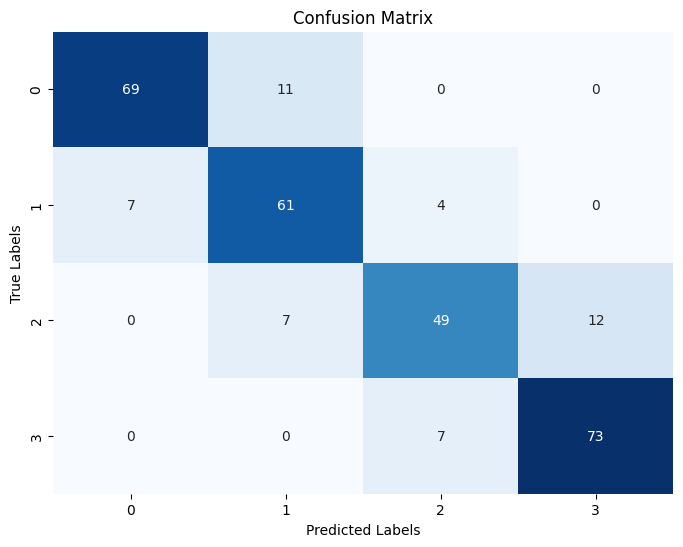

Accuracy of the model: 0.84


In [5]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Use SVC if you prefer SVM
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the preprocessed dataset
# Assuming `processed_data` from previous preprocessing steps
X = processed_data.drop(columns='price_range')  # Predictor attributes
y = processed_data['price_range']  # Label data

# Step 2: Split dataset into training (85%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 3: Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # Adjust parameters as desired
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display accuracy
print(f"Accuracy of the model: {accuracy:.2f}")


4. Membangun model clustering berdasarkan dataset yang telah dilkaukan praproses data, jika memungkinkan Detail pengerjaan clustering adalah sebagai berikut.

  a. Gunakan algoritma K-Means untuk melakukan clustering (Parameter yang digunakan boleh disesuaikan dengan bebas)

  b. Tampilkan silhouette score dai model clustering

In [6]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Gunakan algoritma K-Means
# Menentukan jumlah cluster (misalnya 3, bisa disesuaikan dengan data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)  # Menggunakan X dari data preprocessed (tanpa label)

# Step 2: Menghitung dan menampilkan silhouette score
# Silhouette score untuk menilai kualitas clustering
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score untuk model K-Means dengan {num_clusters} cluster: {silhouette_avg:.2f}")


Silhouette Score untuk model K-Means dengan 3 cluster: 0.06
